# Dimensionality Reduction

This section covers Principal Component Analysis. But first, let's provide a general recipe for unsupervised data analysis so we can see where this fits into our data science workflow:

1. Look at your data, identifying correlated and confouding features
2. Get rid of highly correlated and confounding features and simplify your data
3. Transform your data if necessary
4. Hypothesize (in advance!) why things should cluster based on your EDA
5. Use a variety of unsupervised techniques to cluster your data
6. Use validation metrics to provide an unbiased measurement of clustering performance
7. Deliver some actionable insights

This notebook covers steps 1 to 3. The next notebooks provides a rough introduction to steps 4 to 6. Step 7 is always up to you as a (hopefully experience and subject matter informed) data scientist.

Let's start by importing our packages and helper functions. This notebook also uses some geological maps that were provided by the folks at Enlighten Geoscience and real well data from the BCOGC (for the Montney).

In [2]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.decomposition import PCA

# helper modules
exec(open('helper_functions.py').read())

# Load full geology maps
geo_maps = pd.read_csv('../data/raster_stack.csv')

# load our previously processed well data
unscaled_well_data = pd.read_csv('../data/unscaled_well_data.csv')
scaled_well_data = pd.read_csv('../data/scaled_well_data.csv')

We use a helper function to plot out four of our maps

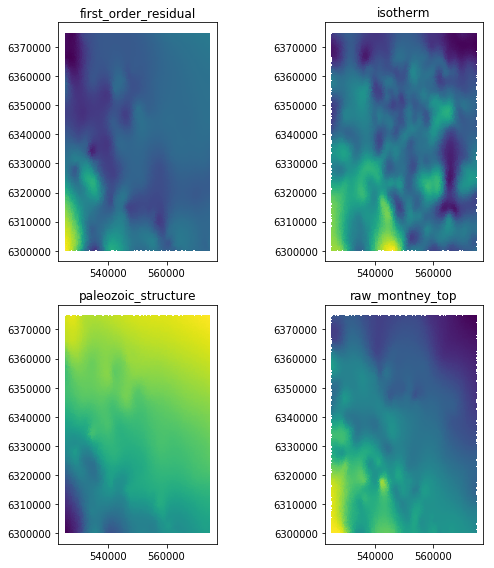

In [3]:
plot_four_maps(geo_maps)

Now let's dive right into principal component analysis (PCA). The important thing to understand about PCA is that it is a dimensionality reduction tool. If you're familiar with geomechanics or vector math - a principal component is analagous to reducing a whole bunch of stress vectors in the subsurface. We can reduce all of these vectors into three principal stresses - two horizontal and one vertical. This is illustrated for a simple two dimensional example below.

<img src="../images/pca_illustration.png" alt="PCA" style="width: 800px;"  align="left"/> 

The chunk below uses sklearn to run principal component analysis of the five geology maps. You can visually see how the principal components reorganize the maps into new combinations, with the first map representing 90% of the variance.

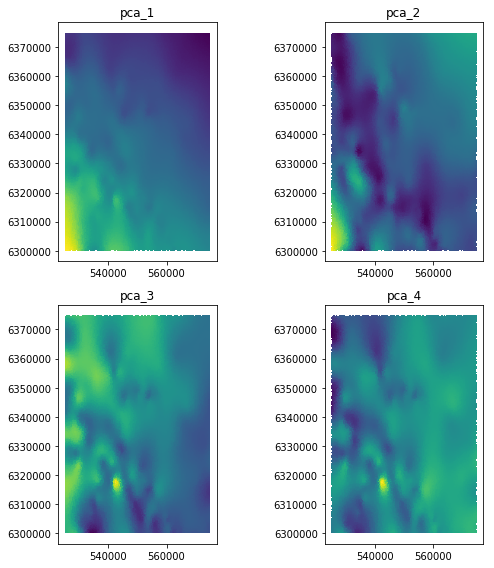

In [4]:
# Use sklearn to do some PCA
geomap_array = geo_maps.iloc[:,3:8]
pca = PCA(n_components=4).fit(geomap_array)
pca_maps = geo_maps.iloc[:,0:3].copy()

for i in range(0,4):
    pca_maps['pca_' + str(i+1)] = pca.transform(geomap_array)[:,i]

# show the four maps to explain how PCAs work, along with some additional 
# images
plot_four_maps(pca_maps)

We can see how much variance each PC has using a `elbow` plot. This shows each PC's contribution to the overall dataset's variance. The plot below shows the individual and cummulative variance.

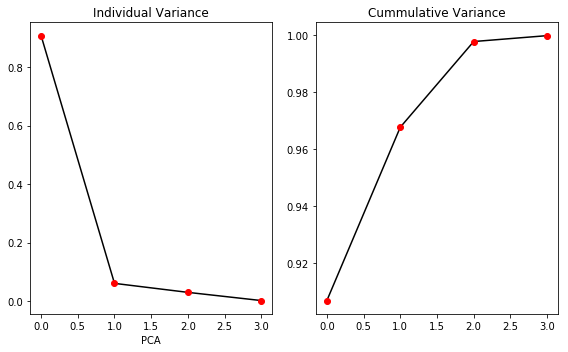

In [5]:
plot_pca_variance(pca)

The next tool we use to investigate PCA results is called a `circle of correlation` or `unit circle` plot. The unit circle plots the first two principal components and the scaled contribution of each variable in those principal components. It also shows how the data varies along the first two principal components. 

<img src="../images/pca_microseismic.png" alt="PCA" style="width: 500px;"  align="left"/> 

This chunk makes a much uglier plot using matplotlib, but provides the same idea as the above

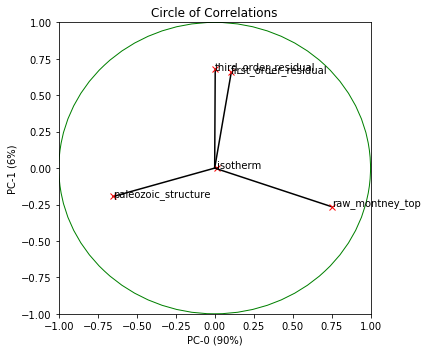

In [6]:
plot_pca_unit_circle(pca, geomap_array)

We now repeat the above process with the unscaled dataset to show how much scale affects PCA, distance measures, and clustering.

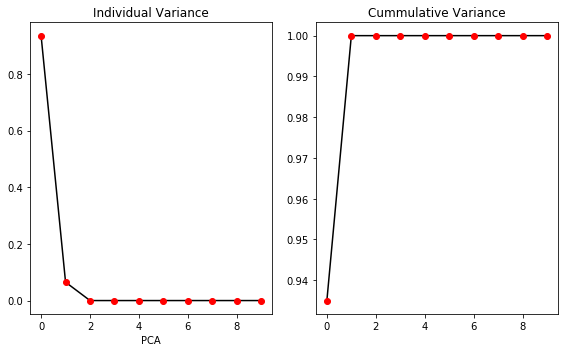

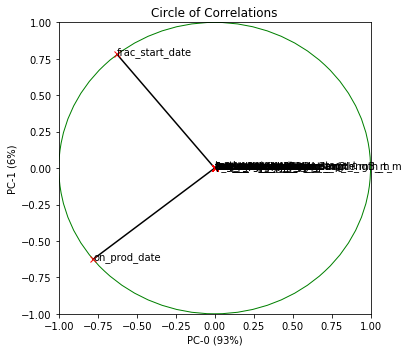

In [7]:
# Lets do the entire unscaled and scaled dataset
pca_unscaled = PCA(n_components=10).fit(unscaled_well_data.values)
plot_pca_variance(pca_unscaled)
plot_pca_unit_circle(pca_unscaled, unscaled_well_data)

We now use the scaled dataset to show why scaling the dataset is so important.

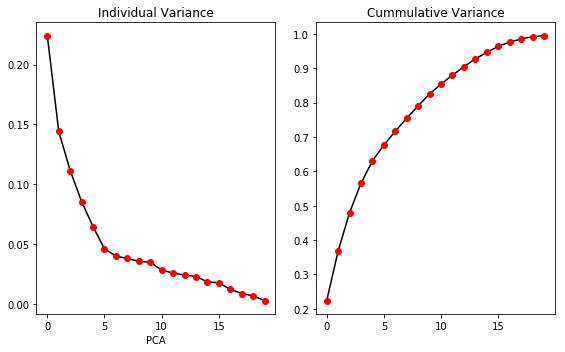

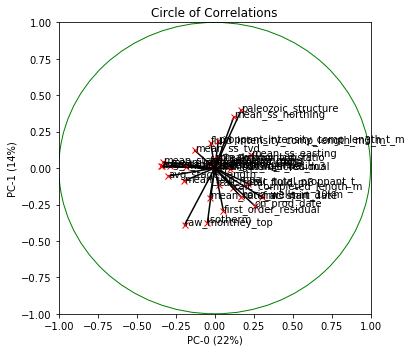

In [8]:
pca_scaled = PCA(n_components=20).fit(scaled_well_data.values)
plot_pca_variance(pca_scaled)
plot_pca_unit_circle(pca_scaled, scaled_well_data)

## Acknowledgments
This presentation wouldn't have been possible without all the support I've received from the following organizations
<img src="../images/untapped_sponsors.jpg" alt="My amazing sponsors" style="width: 400px;"  align="left"/>